# Question 1: University Rankings

In [81]:
import dmba
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [82]:
df= dmba.load_data('Universities.csv')
df

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,West Virginia State College,WV,1,1869.0,NaN,957.0,NaN,NaN,2817.0,1939.0,1988.0,4616.0,1500.0,1700.0,50.0,750.0,750.0,38.0,19.2,NaN
1298,West Virginia University,WV,1,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,2284.0,2026.0,NaN,NaN,NaN,83.0,13.4,57.0
1299,West Virginia Wesleyan College,WV,2,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,1750.0,2025.0,NaN,450.0,1100.0,58.0,16.4,67.0
1300,Wheeling Jesuit College,WV,2,903.0,755.0,213.0,15.0,49.0,971.0,305.0,10500.0,10500.0,2100.0,2445.0,NaN,600.0,600.0,66.0,14.1,72.0


## A. Data Cleaning

In [83]:
df = df.dropna(axis=0, how='any')
df.describe()

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.00000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,1.728238,3147.303609,2062.955414,780.704883,28.012739,55.651805,3562.938429,797.454352,9406.634820,10575.161359,2221.10828,2121.940552,379.021231,548.783439,1311.940552,73.208068,13.962633,65.562633
std,0.445341,4073.138136,2503.752754,915.633300,18.479196,20.324333,4669.226389,1545.796419,5516.794516,4311.672049,713.18811,566.861037,355.855253,163.185575,681.847238,16.665649,3.898855,18.146912
min,1.000000,77.000000,61.000000,27.000000,1.000000,9.000000,249.000000,1.000000,608.000000,1044.000000,640.00000,531.000000,10.000000,90.000000,250.000000,8.000000,2.900000,15.000000
25%,1.000000,802.000000,635.500000,264.000000,15.000000,40.000000,1018.000000,81.500000,3650.500000,7290.000000,1740.00000,1750.000000,137.500000,500.000000,850.000000,63.000000,11.300000,53.000000
50%,2.000000,1646.000000,1227.000000,443.000000,23.000000,54.000000,1715.000000,299.000000,9858.000000,10100.000000,2090.00000,2082.000000,280.000000,500.000000,1200.000000,76.000000,13.400000,66.000000
75%,2.000000,3862.000000,2456.000000,896.500000,36.000000,69.000000,4055.500000,869.000000,13246.000000,13286.000000,2663.00000,2420.000000,486.000000,600.000000,1600.000000,87.000000,16.450000,79.000000
max,2.000000,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,20100.000000,20100.000000,4816.00000,4541.000000,3247.000000,2340.000000,6800.000000,103.000000,28.800000,118.000000


## B. Hierachical Clustering

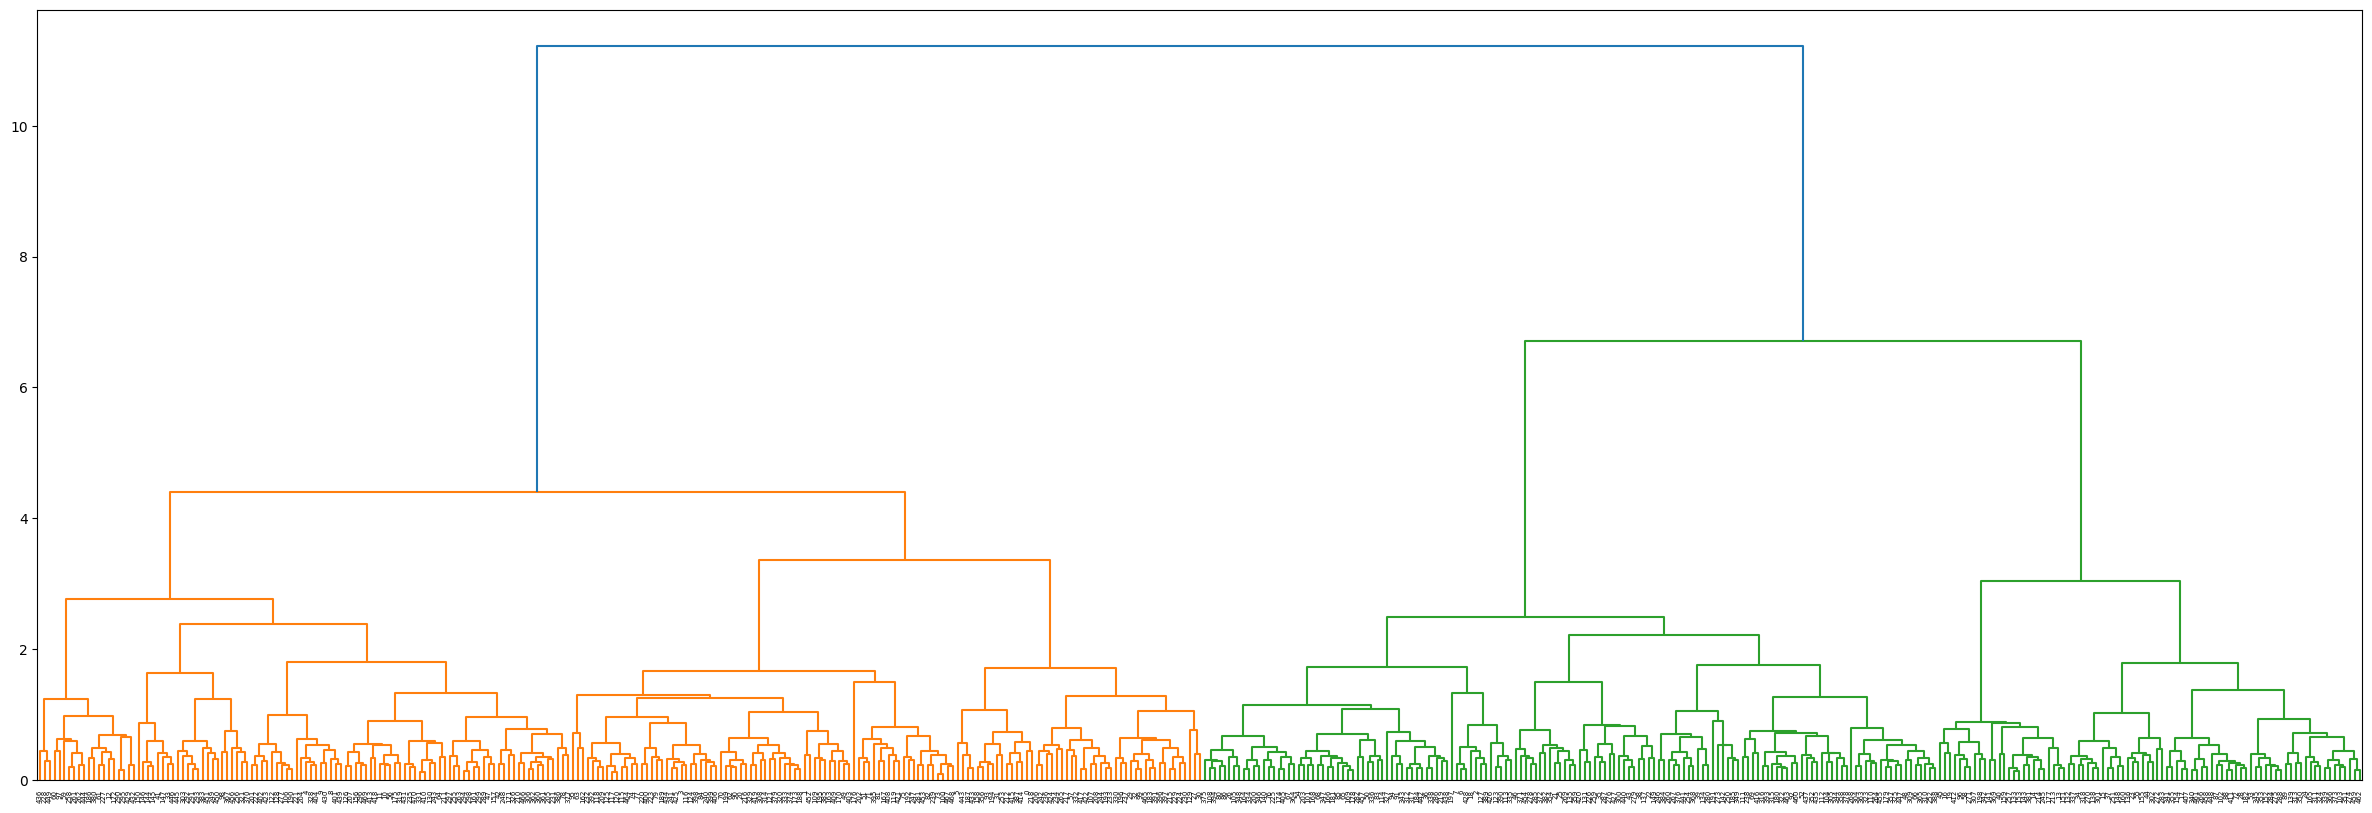

In [87]:
plt.figure(figsize=(30,10))
cont_list = list(df.columns[10:])
cont_list.extend( ['% new stud. from top 10%', '% new stud. from top 25%'])
data = MinMaxScaler().fit_transform(df[cont_list])
linkage_data = linkage(data, metric="euclidean", method="ward")
dendrogram(linkage_data)
plt.show()

According to the dendogram there should be 4 clusters

## C. Cluster Characterization

In [125]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage='ward')
labels = list(hierarchical_cluster.fit_predict(data))
df["Cluster Labels"] = labels

cluster_groups = df.groupby(["Cluster Labels"])
cluster_groups.get_group((0,)).describe().loc[['count', 'mean', 'min', '50%', 'max' ]]

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
count,128.000000,128.00000,128.00000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0000,128.000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.0
mean,1.664062,1392.28125,1073.21875,532.40625,14.640625,38.085938,2322.007812,875.382812,6111.085938,7255.804688,1716.8125,1764.375,288.328125,533.429688,1518.742188,57.914062,15.107812,48.898438,0.0
min,1.000000,77.00000,61.00000,27.00000,1.000000,9.000000,249.000000,13.000000,628.000000,1044.000000,640.0000,531.000,10.000000,90.000000,250.000000,8.000000,6.700000,15.000000,0.0
50%,2.000000,802.50000,635.00000,270.50000,14.000000,37.500000,1083.000000,320.000000,7650.000000,7800.000000,1750.0000,1782.500,205.000000,500.000000,1499.000000,58.500000,14.900000,50.000000,0.0
max,2.000000,11054.00000,6397.00000,3524.00000,39.000000,82.000000,16502.000000,21836.000000,11230.000000,11230.000000,3843.0000,3240.000,1030.000000,2340.000000,3700.000000,96.000000,28.800000,91.000000,0.0


In [128]:
cluster_groups.get_group((1,)).describe().loc[['count', 'mean', 'min', '50%', 'max' ]]

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0,86.000000,86.000000,86.000000,86.00000,86.000000,86.000000,86.00000,86.000000,86.000000,86.000000,86.0
mean,1.988372,4312.244186,2257.139535,706.337209,53.255814,80.011628,2752.465116,225.0,17580.023256,17580.023256,2876.081395,2583.44186,381.011628,575.127907,957.55814,89.372093,10.117442,83.686047,1.0
min,1.000000,587.000000,501.000000,139.000000,21.000000,49.000000,569.000000,1.0,13750.000000,13750.000000,1623.000000,1770.00000,70.000000,300.000000,300.00000,73.000000,2.900000,59.000000,1.0
50%,2.000000,2891.000000,1716.000000,489.500000,49.000000,82.000000,1852.500000,61.5,17852.500000,17852.500000,2866.000000,2459.00000,272.500000,527.500000,860.00000,91.000000,10.500000,83.000000,1.0
max,2.000000,20192.000000,13007.000000,3810.000000,96.000000,100.000000,14971.000000,3113.0,20100.000000,20100.000000,4816.000000,4541.00000,1836.000000,1495.000000,2210.00000,100.000000,15.200000,100.000000,1.0


In [129]:
cluster_groups.get_group((2,)).describe().loc[['count', 'mean', 'min', '50%', 'max' ]]

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
count,149.0,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00000,149.000000,149.000000,149.000000,149.000000,149.0
mean,2.0,1736.604027,1336.744966,443.557047,26.389262,55.771812,1795.255034,514.483221,11780.187919,11779.516779,2348.697987,2378.342282,281.818792,527.38255,1168.691275,72.369128,13.430201,72.308725,2.0
min,2.0,150.000000,130.000000,82.000000,3.000000,14.000000,309.000000,1.000000,8025.000000,8025.000000,1025.000000,1260.000000,10.000000,330.00000,300.000000,22.000000,4.600000,42.000000,2.0
50%,2.0,1179.000000,922.000000,350.000000,24.000000,56.000000,1337.000000,242.000000,11600.000000,11600.000000,2235.000000,2290.000000,210.000000,500.00000,1000.000000,73.000000,13.200000,72.000000,2.0
max,2.0,11901.000000,8492.000000,2517.000000,67.000000,93.000000,11160.000000,10221.000000,15960.000000,15960.000000,4358.000000,3700.000000,1404.000000,1000.00000,6800.000000,97.000000,27.800000,118.000000,2.0


In [130]:
cluster_groups.get_group((3,)).describe().loc[['count', 'mean', 'min', '50%', 'max' ]]

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate,Cluster Labels
count,108.000000,108.000000,108.00,108.000000,108.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.00000,108.000000,108.000000,108.0
mean,1.222222,6245.935185,4083.25,1599.342593,26.0,56.907407,8117.796296,1551.333333,3529.407407,7269.703704,2121.212963,1824.490741,619.027778,575.527778,1546.666667,79.62037,16.401852,61.574074,3.0
min,1.000000,355.000000,300.00,142.000000,1.0,13.000000,509.000000,11.000000,608.000000,3040.000000,830.000000,1000.000000,20.000000,96.000000,500.000000,53.00000,7.800000,31.000000,3.0
50%,1.000000,4896.000000,3092.50,1094.500000,23.5,57.000000,5802.500000,1179.000000,2772.500000,6825.000000,1984.000000,1810.000000,511.000000,597.500000,1425.000000,80.50000,16.650000,62.500000,3.0
max,2.000000,48094.000000,26330.00,6392.000000,75.0,95.000000,31643.000000,7152.000000,10060.000000,15516.000000,3764.000000,3000.000000,3247.000000,1125.000000,3324.000000,103.00000,24.700000,99.000000,3.0
